Doğruluk Skoru: 0.9692982456140351


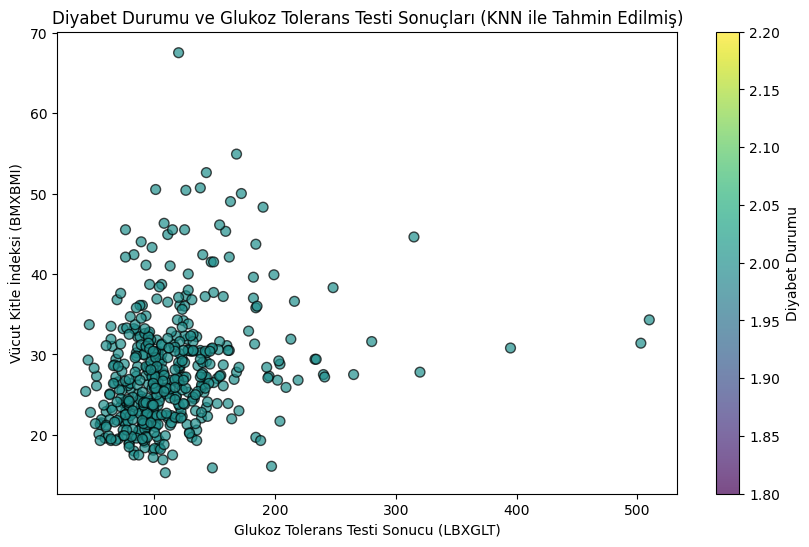

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


df = pd.read_csv('NHANES_age_prediction.csv')

X = df[['LBXGLT', 'BMXBMI']]
y = df['DIQ010']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Doğruluk Skoru: {accuracy}')

plt.figure(figsize=(10, 6))
plt.scatter(X_test['LBXGLT'], X_test['BMXBMI'], c=y_pred, cmap='viridis', s=50, alpha=0.7, edgecolors='k')
plt.title('Diyabet Durumu ve Glukoz Tolerans Testi Sonuçları (KNN ile Tahmin Edilmiş)')
plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.colorbar(label='Diyabet Durumu')
plt.show()


Doğruluk Skoru: 0.9692982456140351


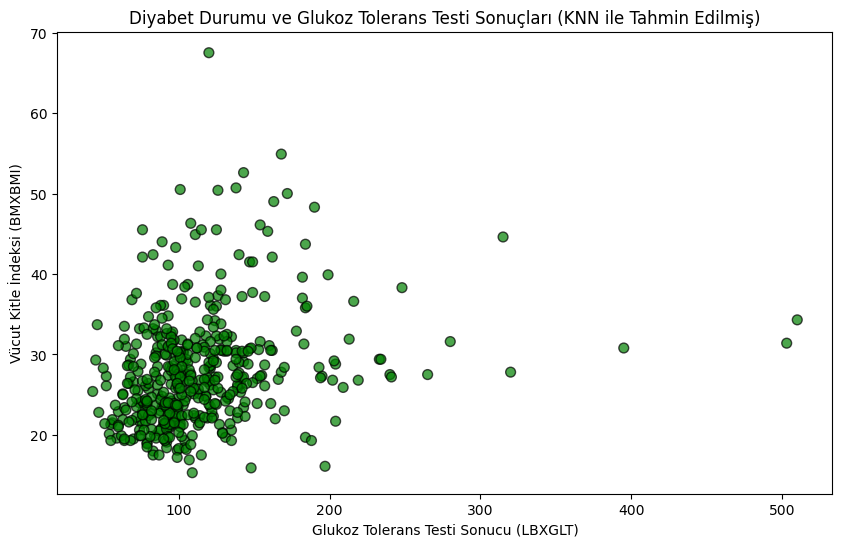

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('NHANES_age_prediction.csv')

X = df[['LBXGLT', 'BMXBMI']]
y = df['DIQ010']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Doğruluk Skoru: {accuracy}')

plt.figure(figsize=(10, 6))
colors = ['red' if value == 1 else 'green' for value in y_pred]
plt.scatter(X_test['LBXGLT'], X_test['BMXBMI'], c=colors, s=50, alpha=0.7, edgecolors='k')
plt.title('Diyabet Durumu ve Glukoz Tolerans Testi Sonuçları (KNN ile Tahmin Edilmiş)')
plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.show()


Doğruluk Skoru: 0.9692982456140351


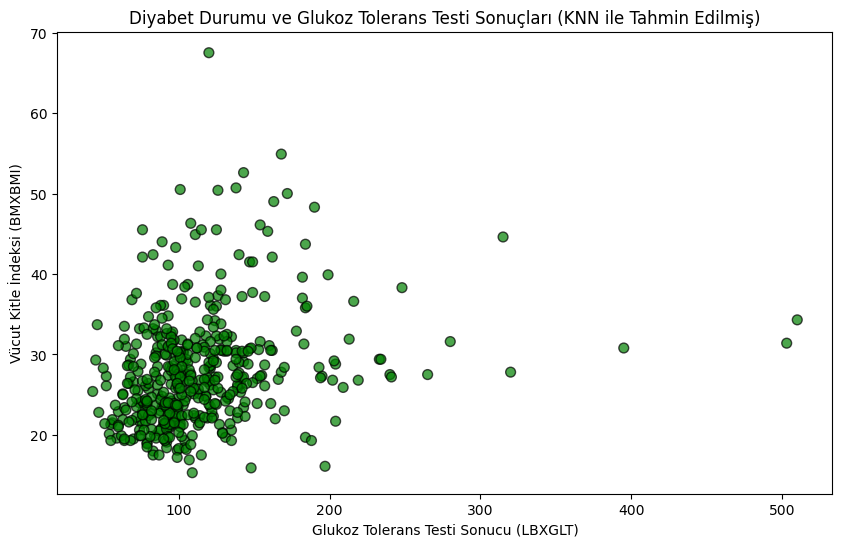

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv('NHANES_age_prediction.csv')

X = df[['LBXGLT', 'BMXBMI']]
y = df['DIQ010']  # Diyabet durumu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Doğruluk Skoru: {accuracy}')

plt.figure(figsize=(10, 6))
colors = ['red' if value == 1 else 'green' if value == 2 else 'blue' for value in y_pred]
plt.scatter(X_test['LBXGLT'], X_test['BMXBMI'], c=colors, s=50, alpha=0.7, edgecolors='k')
plt.title('Diyabet Durumu ve Glukoz Tolerans Testi Sonuçları (KNN ile Tahmin Edilmiş)')
plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.show()


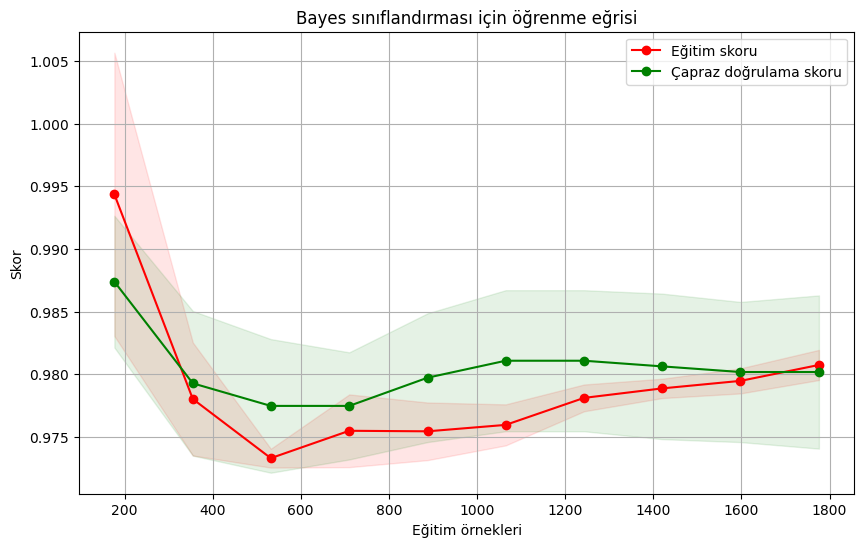

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler

file_path = 'NHANES_age_prediction.csv'  
data = pd.read_csv(file_path)

train_data = data[data['DIQ010'] != 3]

X = train_data[['LBXGLT', 'BMXBMI']]
y = train_data['DIQ010']
scaler = StandardScaler()
X = scaler.fit_transform(X)

nb = GaussianNB()

train_sizes, train_scores, test_scores = learning_curve(nb, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Eğitim skoru")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Çapraz doğrulama skoru")

plt.title("Bayes sınıflandırması için öğrenme eğrisi")
plt.xlabel("Eğitim örnekleri")
plt.ylabel("Skor")
plt.legend(loc="best")
plt.grid()
plt.show()


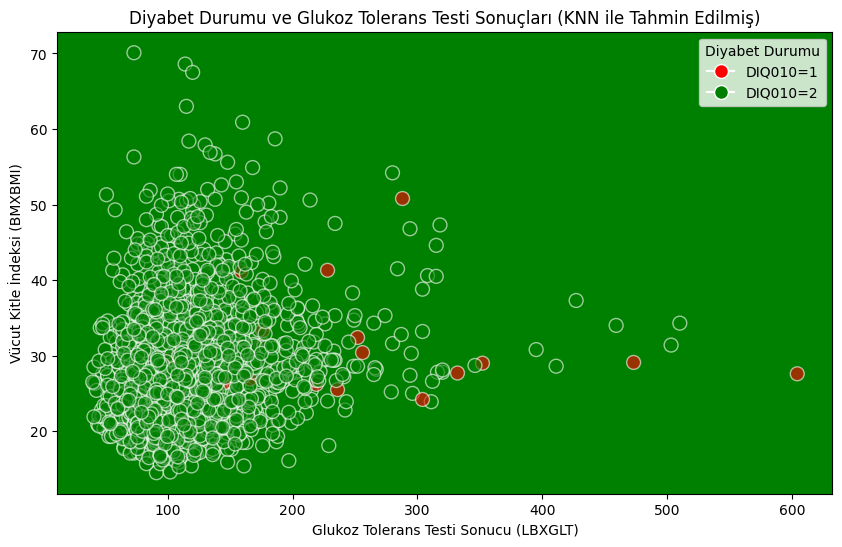

0.993421052631579

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

train_data = data[data['DIQ010'] != 3] 
test_data = data[data['DIQ010'] == 3]   

X_train = train_data[['LBXGLT', 'BMXBMI']].values
y_train = train_data['DIQ010'].values

if not test_data.empty:
    X_test = test_data[['LBXGLT', 'BMXBMI']].values

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    predicted_values = knn.predict(X_test)
    data.loc[data['DIQ010'] == 3, 'DIQ010'] = predicted_values

X = data[['LBXGLT', 'BMXBMI']]
y = data['DIQ010']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)

knn.fit(X_train_all, y_train_all)
y_pred_all = knn.predict(X_test_all)
accuracy = accuracy_score(y_test_all, y_pred_all)

plt.figure(figsize=(10, 6))

colors = {1: 'red', 2: 'green'}
background_color = 'green' if len(data[data['DIQ010'] == 2]) > len(data[data['DIQ010'] == 1]) else 'red'
plt.gca().set_facecolor(background_color)

scatter = plt.scatter(data['LBXGLT'], data['BMXBMI'], 
                      c=[colors[i] for i in data['DIQ010']], alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.title('Diyabet Durumu ve Glukoz Tolerans Testi Sonuçları (KNN ile Tahmin Edilmiş)')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'DIQ010={i}') for i in colors]
plt.legend(handles=handles, title='Diyabet Durumu')

plt.show()

accuracy


Accuracy: 0.9932432432432432
Confusion Matrix:
[[  0   3]
 [  0 441]]
Classification Report:


/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.99      1.00      1.00       441

    accuracy                           0.99       444
   macro avg       0.50      0.50      0.50       444
weighted avg       0.99      0.99      0.99       444

Cross-Validation Accuracy: 0.9905405405405405


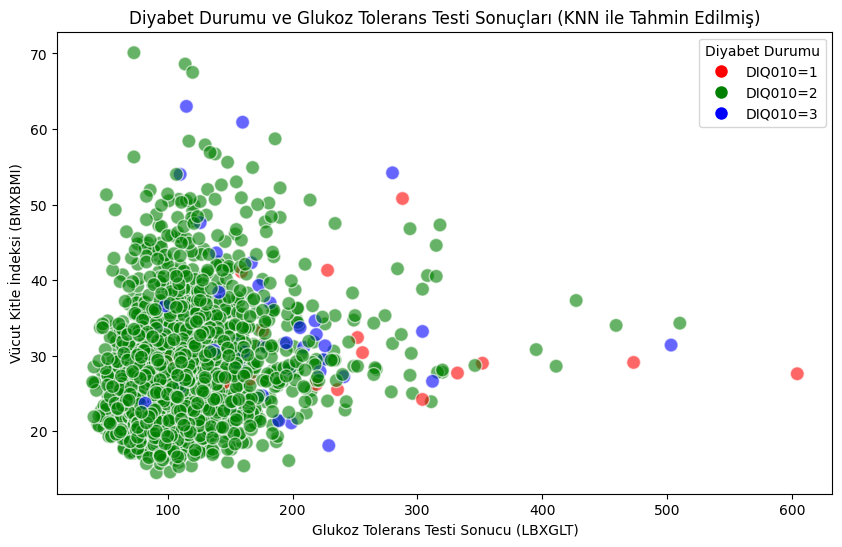

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)
train_data = data[data['DIQ010'] != 3]

X = train_data[['LBXGLT', 'BMXBMI']]
y = train_data['DIQ010']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

cv_scores = cross_val_score(knn, X, y, cv=5)
print(f"Cross-Validation Accuracy: {np.mean(cv_scores)}")

plt.figure(figsize=(10, 6))

colors = {1: 'red', 2: 'green', 3: 'blue'}  
scatter = plt.scatter(data['LBXGLT'], data['BMXBMI'], 
                      c=[colors[i] for i in data['DIQ010']], alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.title('Diyabet Durumu ve Glukoz Tolerans Testi Sonuçları (KNN ile Tahmin Edilmiş)')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'DIQ010={i}') for i in colors]
plt.legend(handles=handles, title='Diyabet Durumu')

plt.show()


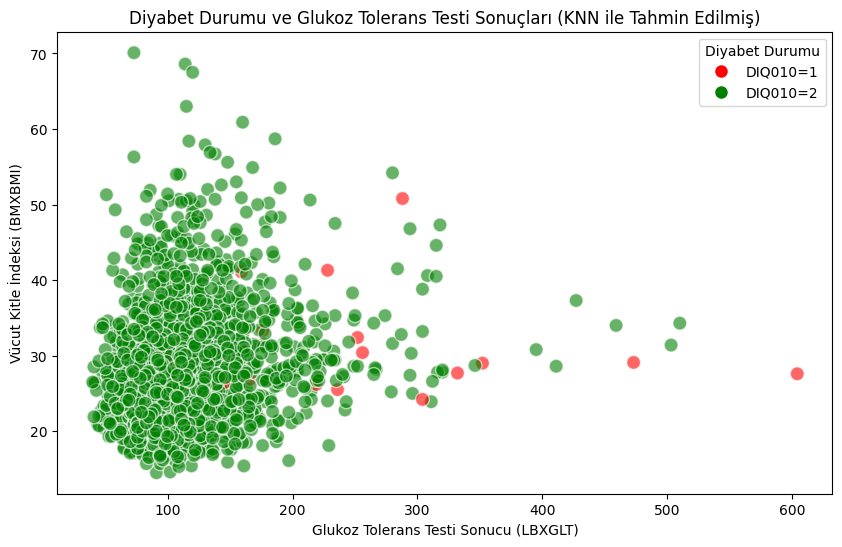

0.9932432432432432

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

train_data = data[data['DIQ010'] != 3]
unknown_data = data[data['DIQ010'] == 3]

X_train = train_data[['LBXGLT', 'BMXBMI']]
y_train = train_data['DIQ010']
X_unknown = unknown_data[['LBXGLT', 'BMXBMI']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_unknown = scaler.transform(X_unknown)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_unknown_pred = knn.predict(X_unknown)

data.loc[data['DIQ010'] == 3, 'DIQ010'] = y_unknown_pred
plt.figure(figsize=(10, 6))

colors = {1: 'red', 2: 'green'}  
scatter = plt.scatter(data['LBXGLT'], data['BMXBMI'], 
                      c=[colors[i] for i in data['DIQ010']], alpha=0.6, edgecolors='w', s=100)

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.title('Diyabet Durumu ve Glukoz Tolerans Testi Sonuçları (KNN ile Tahmin Edilmiş)')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'DIQ010={i}') for i in colors]
plt.legend(handles=handles, title='Diyabet Durumu')

plt.show()

accuracy


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

train_data = data[data['DIQ010'] != 3]
unknown_data = data[data['DIQ010'] == 3]
X_train = train_data[['LBXGLT', 'BMXBMI']]
y_train = train_data['DIQ010']
X_unknown = unknown_data[['LBXGLT', 'BMXBMI']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_unknown = scaler.transform(X_unknown)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_unknown_pred = knn.predict(X_unknown)

data.loc[data['DIQ010'] == 3, 'DIQ010'] = y_unknown_pred

h = .02  # adım boyutu
x_min, x_max = data['LBXGLT'].min() - 1, data['LBXGLT'].max() + 1
y_min, y_max = data['BMXBMI'].min() - 1, data['BMXBMI'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

scatter = plt.scatter(data['LBXGLT'], data['BMXBMI'], 
                      c=[cmap_bold.colors[i-1] for i in data['DIQ010']], alpha=0.6, edgecolors='k', s=100)

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.title('KNN ile Diyabet Durumu Sınıflandırması')

plt.legend(handles=scatter.legend_elements()[0], labels=['Diyabet (Evet)', 'Diyabet (Hayır)'])

plt.show()


<class 'numpy.core._exceptions._ArrayMemoryError'>: Unable to allocate 622. MiB for an array with shape (2880, 28300) and data type float64

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

train_data = data[data['DIQ010'] != 3]
unknown_data = data[data['DIQ010'] == 3]

X_train = train_data[['LBXGLT', 'BMXBMI']]
y_train = train_data['DIQ010']
X_unknown = unknown_data[['LBXGLT', 'BMXBMI']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_unknown = scaler.transform(X_unknown)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_unknown_pred = nb.predict(X_unknown)

data.loc[data['DIQ010'] == 3, 'DIQ010'] = y_unknown_pred

h = .02  # adım boyutu
x_min, x_max = data['LBXGLT'].min() - 1, data['LBXGLT'].max() + 1
y_min, y_max = data['BMXBMI'].min() - 1, data['BMXBMI'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = nb.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

scatter = plt.scatter(data['LBXGLT'], data['BMXBMI'], 
                      c=[cmap_bold.colors[i-1] for i in data['DIQ010']], alpha=0.6, edgecolors='k', s=100)
plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.title('Naive Bayes ile Diyabet Durumu Sınıflandırması')

plt.legend(handles=scatter.legend_elements()[0], labels=['Diyabet (Evet)', 'Diyabet (Hayır)'])

plt.show()


<class 'numpy.core._exceptions._ArrayMemoryError'>: Unable to allocate 622. MiB for an array with shape (2880, 28300) and data type float64

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


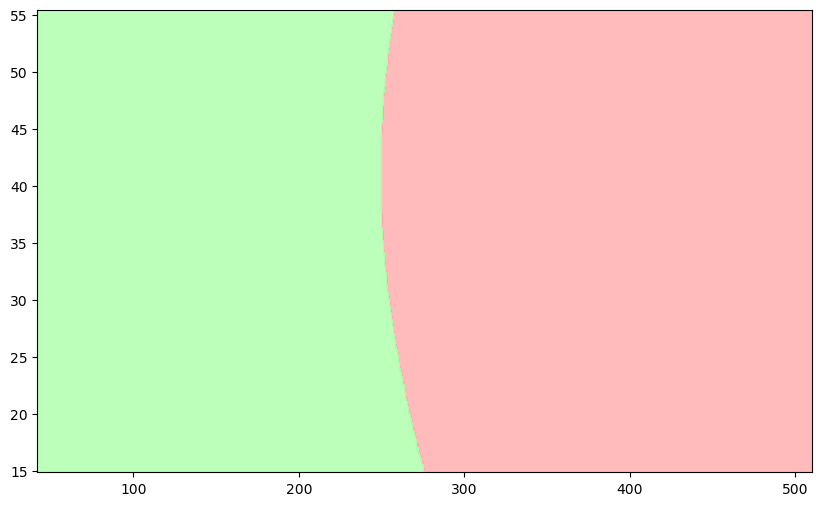

<class 'TypeError'>: list indices must be integers or slices, not float

In [21]:
import pandas as pd


/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


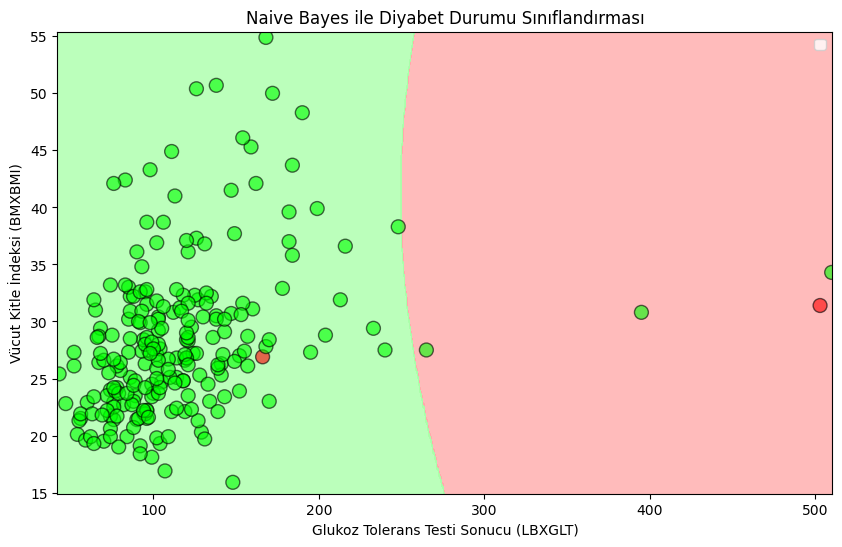

0.9932432432432432

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

train_data = data[data['DIQ010'] != 3]
unknown_data = data[data['DIQ010'] == 3]

X_train = train_data[['LBXGLT', 'BMXBMI']]
y_train = train_data['DIQ010']
X_unknown = unknown_data[['LBXGLT', 'BMXBMI']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_unknown = scaler.transform(X_unknown)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_unknown_pred = nb.predict(X_unknown)

data.loc[data['DIQ010'] == 3, 'DIQ010'] = y_unknown_pred

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'BMXBMI']]
y_sample = data_sample['DIQ010'].astype(int)

h = .5  # adım boyutu
x_min, x_max = X_sample['LBXGLT'].min() - 1, X_sample['LBXGLT'].max() + 1
y_min, y_max = X_sample['BMXBMI'].min() - 1, X_sample['BMXBMI'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = nb.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

scatter = plt.scatter(X_sample['LBXGLT'], X_sample['BMXBMI'], 
                      c=[cmap_bold.colors[i-1] for i in y_sample], alpha=0.6, edgecolors='k', s=100)

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.title('Naive Bayes ile Diyabet Durumu Sınıflandırması')

plt.legend(handles=scatter.legend_elements()[0], labels=['Diyabet (Evet)', 'Diyabet (Hayır)'])

plt.show()

accuracy

/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


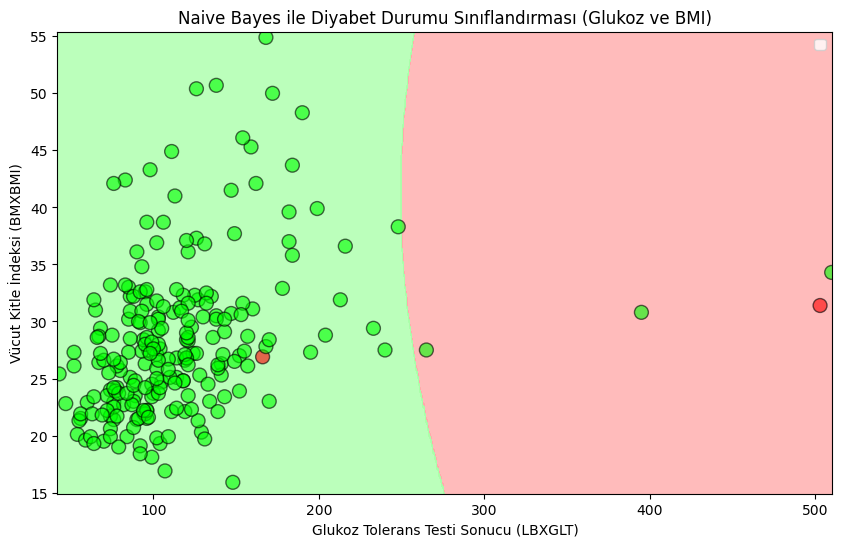

Modelin doğruluk oranı: 98.11%


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'BMXBMI']]
y = data['DIQ010']

train_data = data[data['DIQ010'] != 3]
unknown_data = data[data['DIQ010'] == 3]

X_train = train_data[['LBXGLT', 'BMXBMI']]
y_train = train_data['DIQ010']
X_unknown = unknown_data[['LBXGLT', 'BMXBMI']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_unknown = scaler.transform(X_unknown)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_unknown_pred = nb.predict(X_unknown)

data.loc[data['DIQ010'] == 3, 'DIQ010'] = y_unknown_pred

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'BMXBMI']]
y_sample = data_sample['DIQ010'].astype(int)

h = .5  # adım boyutu
x_min, x_max = X_sample['LBXGLT'].min() - 1, X_sample['LBXGLT'].max() + 1
y_min, y_max = X_sample['BMXBMI'].min() - 1, X_sample['BMXBMI'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = nb.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

scatter = plt.scatter(X_sample['LBXGLT'], X_sample['BMXBMI'], 
                      c=[cmap_bold.colors[i-1] for i in y_sample], alpha=0.6, edgecolors='k', s=100)

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.title('Naive Bayes ile Diyabet Durumu Sınıflandırması (Glukoz ve BMI)')

plt.legend(handles=scatter.legend_elements()[0], labels=['Diyabet (Evet)', 'Diyabet (Hayır)'])

plt.show()

y_pred = nb.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/lib/python3.11/site-packages/matplotlib/collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


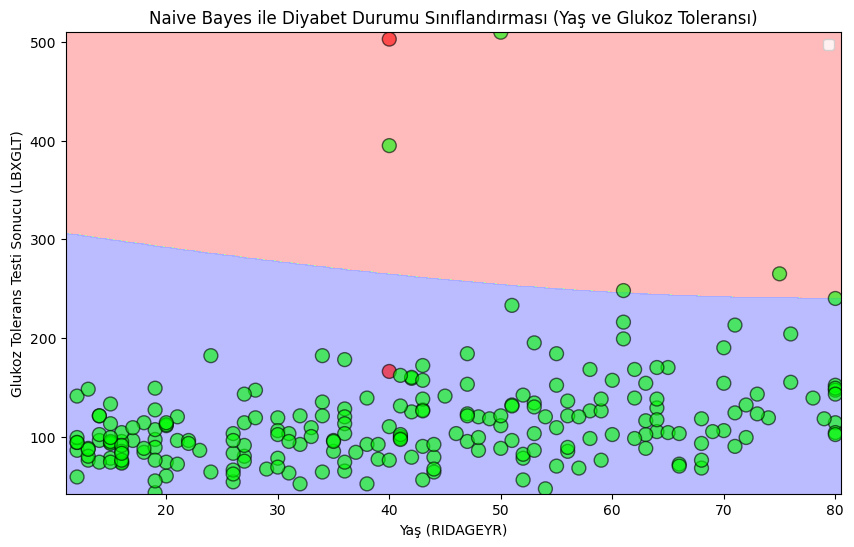

Modelin doğruluk oranı: 97.97%


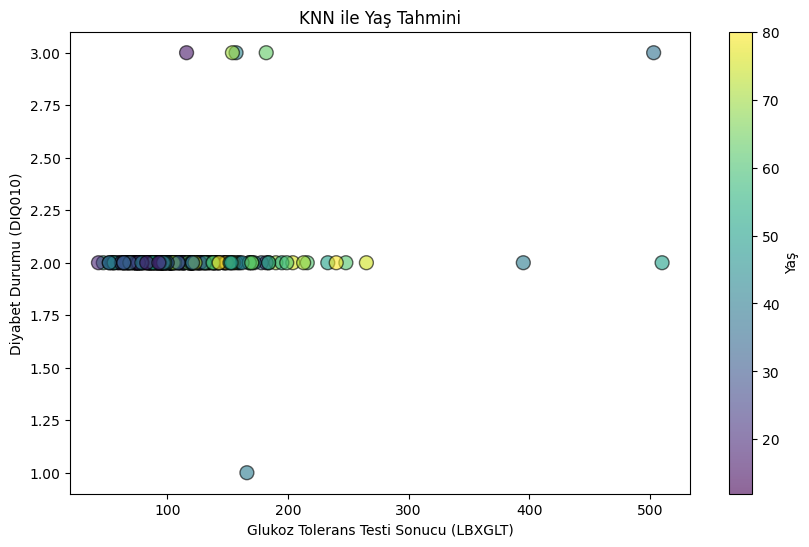

Modelin doğruluk oranı: 10.81%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'DIQ010']]
y = data['RIDAGEYR']

train_data = data[data['DIQ010'] != 3]
unknown_data = data[data['DIQ010'] == 3]

X_train = train_data[['LBXGLT', 'DIQ010']]
y_train = train_data['RIDAGEYR']
X_unknown = unknown_data[['LBXGLT', 'DIQ010']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_unknown = scaler.transform(X_unknown)


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_unknown_pred = knn.predict(X_unknown)

data.loc[data['DIQ010'] == 3, 'RIDAGEYR'] = y_unknown_pred

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'DIQ010']]
y_sample = data_sample['RIDAGEYR'].astype(int)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample['LBXGLT'], X_sample['DIQ010'], 
                      c=y_sample, alpha=0.6, edgecolors='k', s=100, cmap='viridis')

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Diyabet Durumu (DIQ010)')
plt.title('KNN ile Yaş Tahmini')

plt.colorbar(scatter, label='Yaş')

plt.show()

y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


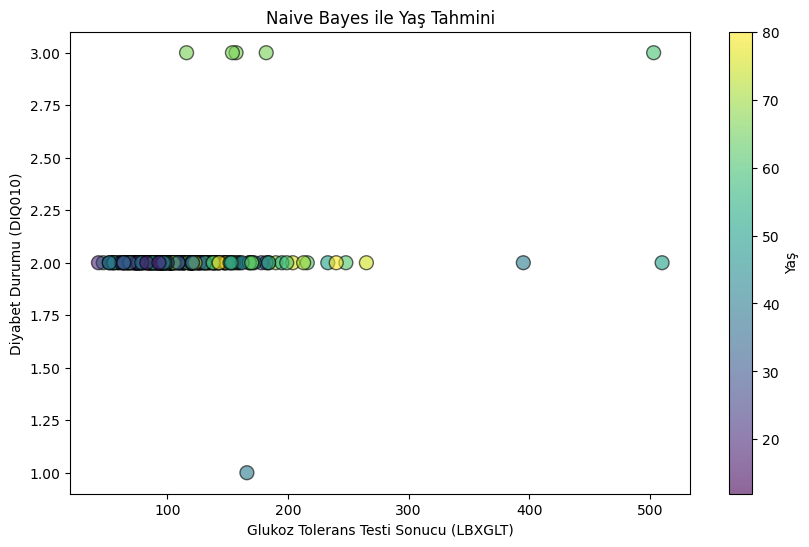

Modelin doğruluk oranı: 4.01%


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'DIQ010']]
y = data['RIDAGEYR']
train_data = data[data['DIQ010'] != 3]
unknown_data = data[data['DIQ010'] == 3]

X_train = train_data[['LBXGLT', 'DIQ010']]
y_train = train_data['RIDAGEYR']
X_unknown = unknown_data[['LBXGLT', 'DIQ010']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_unknown = scaler.transform(X_unknown)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_unknown_pred = nb.predict(X_unknown)

data.loc[data['DIQ010'] == 3, 'RIDAGEYR'] = y_unknown_pred

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'DIQ010']]
y_sample = data_sample['RIDAGEYR'].astype(int)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample['LBXGLT'], X_sample['DIQ010'], 
                      c=y_sample, alpha=0.6, edgecolors='k', s=100, cmap='viridis')

plt.xlabel('Glukoz Tolerans Testi Sonucu')
plt.ylabel('Diyabet Durumu')
plt.title('Naive Bayes ile Yaş Tahmini')

plt.colorbar(scatter, label='Yaş')

plt.show()
y_pred = nb.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


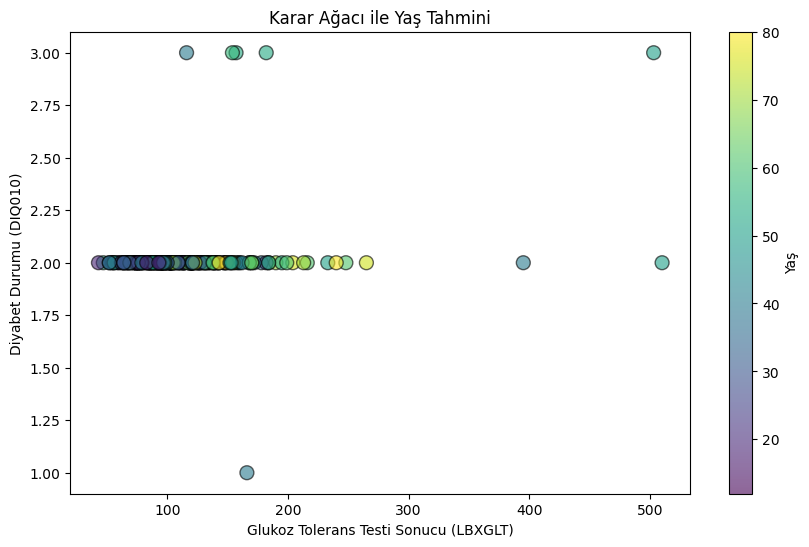

Modelin doğruluk oranı: 5.14%


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'DIQ010']]
y = data['RIDAGEYR']



train_data = data[data['DIQ010'] != 3]
unknown_data = data[data['DIQ010'] == 3]


X_train = train_data[['LBXGLT', 'DIQ010']]
y_train = train_data['RIDAGEYR']
X_unknown = unknown_data[['LBXGLT', 'DIQ010']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_unknown = scaler.transform(X_unknown)

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_unknown_pred = tree.predict(X_unknown)

data.loc[data['DIQ010'] == 3, 'RIDAGEYR'] = y_unknown_pred

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'DIQ010']]
y_sample = data_sample['RIDAGEYR'].astype(int)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample['LBXGLT'], X_sample['DIQ010'], 
                      c=y_sample, alpha=0.6, edgecolors='k', s=100, cmap='viridis')

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Diyabet Durumu (DIQ010)')
plt.title('Karar Ağacı ile Yaş Tahmini')

plt.colorbar(scatter, label='Yaş')

plt.show()
y_pred = tree.predict(X_train)
accuracy = accuracy_score(y_train, y_pred.round())
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


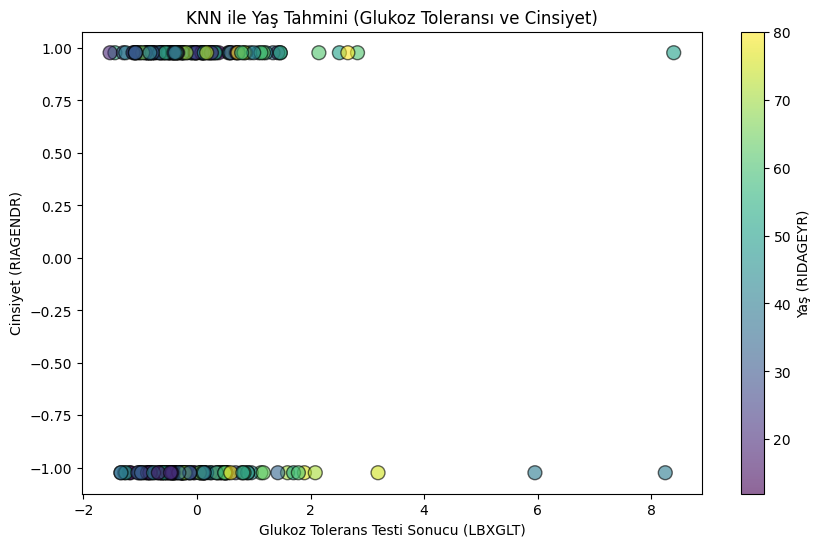

Modelin doğruluk oranı: 18.53%


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'RIAGENDR']]
y = data['RIDAGEYR']

X_train = X
y_train = y

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'RIAGENDR']]
y_sample = data_sample['RIDAGEYR'].astype(int)

X_sample = scaler.transform(X_sample)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample[:, 0], X_sample[:, 1], 
                      c=y_sample, alpha=0.6, edgecolors='k', s=100, cmap='viridis')

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Cinsiyet (RIAGENDR)')
plt.title('KNN ile Yaş Tahmini (Glukoz Toleransı ve Cinsiyet)')
plt.colorbar(scatter, label='Yaş (RIDAGEYR)')

plt.show()
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred.round())
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'PAD200']]
y = data['RIDAGEYR']

X_train = X
y_train = y

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)




<class 'KeyError'>: "['PAD200'] not in index"

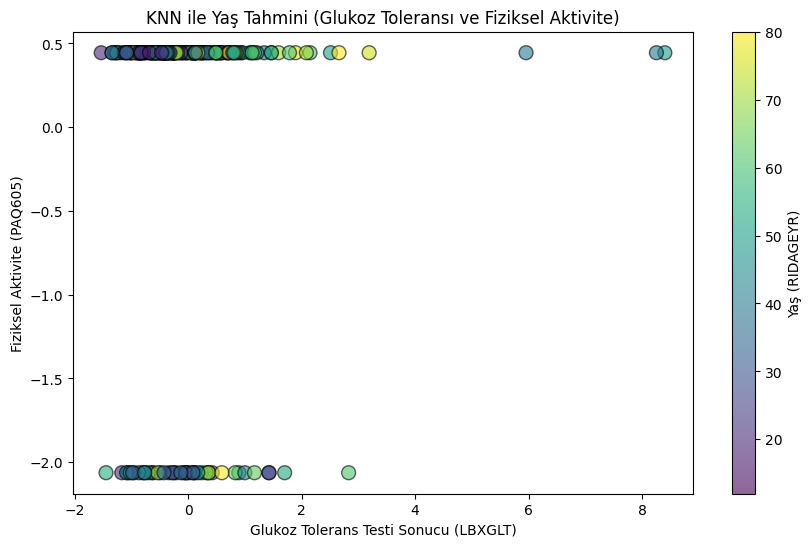

Modelin doğruluk oranı: 11.63%


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'PAQ605']]
y = data['RIDAGEYR']

X_train = X
y_train = y

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'PAQ605']]
y_sample = data_sample['RIDAGEYR'].astype(int)

X_sample = scaler.transform(X_sample)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample[:, 0], X_sample[:, 1], 
                      c=y_sample, alpha=0.6, edgecolors='k', s=100, cmap='viridis')

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Fiziksel Aktivite (PAQ605)')
plt.title('KNN ile Yaş Tahmini (Glukoz Toleransı ve Fiziksel Aktivite)')

plt.colorbar(scatter, label='Yaş (RIDAGEYR)')

plt.show()
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred.round())
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


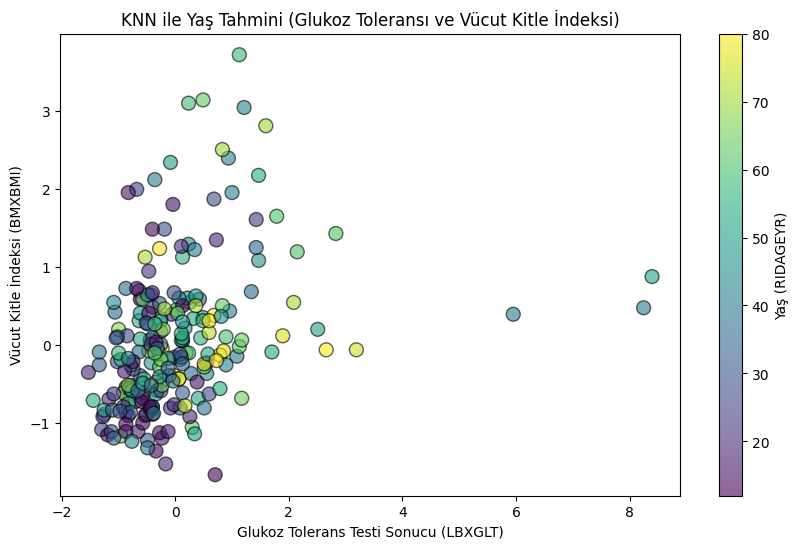

Modelin doğruluk oranı: 95.26%


In [81]:
import pandas as pd

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

min_lbxglt = data['LBXGLT'].min()
max_lbxglt = data['LBXGLT'].max()

print(f"En düşük LBXGLT değeri: {min_lbxglt}")
print(f"En yüksek LBXGLT değeri: {max_lbxglt}")


En düşük LBXGLT değeri: 40.0
En yüksek LBXGLT değeri: 604.0


In [59]:
import pandas as pd

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

min_lbxglt = data['BMXBMI'].min()
max_lbxglt = data['BMXBMI'].max()

print(f"En düşük LBXGLT değeri: {min_lbxglt}")
print(f"En yüksek LBXGLT değeri: {max_lbxglt}")


En düşük LBXGLT değeri: 14.5
En yüksek LBXGLT değeri: 70.1


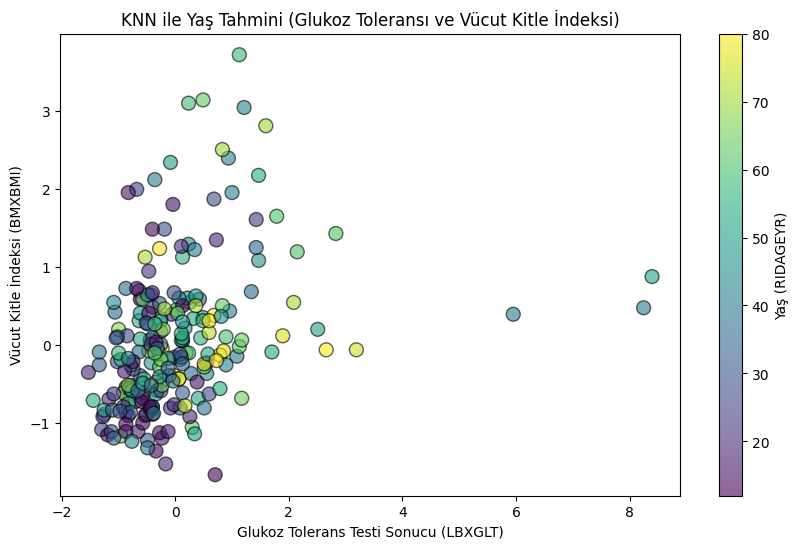

Modelin doğruluk oranı: 16.11%


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)
X = data[['LBXGLT', 'BMXBMI']]
y = data['RIDAGEYR']

X_train = X
y_train = y

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'BMXBMI']]
y_sample = data_sample['RIDAGEYR'].astype(int)

X_sample = scaler.transform(X_sample)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample[:, 0], X_sample[:, 1], 
                      c=y_sample, alpha=0.6, edgecolors='k', s=100, cmap='viridis')

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('Vücut Kitle İndeksi (BMXBMI)')
plt.title('KNN ile Yaş Tahmini (Glukoz Toleransı ve Vücut Kitle İndeksi)')

plt.colorbar(scatter, label='Yaş (RIDAGEYR)')

plt.show()
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred.round())
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


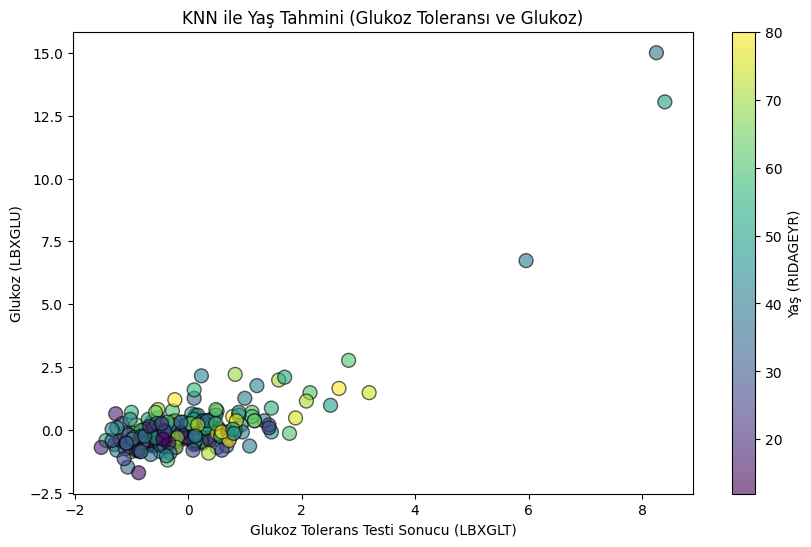

Modelin doğruluk oranı: 14.88%


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'LBXGLU']]
y = data['RIDAGEYR']
X_train = X
y_train = y

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=13)  # k=5 olarak belirledim, daha iyi bir doğruluk için değerlendirilebilir
knn.fit(X_train, y_train)

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'LBXGLU']]
y_sample = data_sample['RIDAGEYR'].astype(int)

X_sample = scaler.transform(X_sample)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample[:, 0], X_sample[:, 1], 
                      c=y_sample, alpha=0.6, edgecolors='k', s=100, cmap='viridis')

plt.xlabel('Glukoz Tolerans Testi Sonucu')
plt.ylabel('Glukoz')
plt.title('Naive Bayes ile Yaş Tahmini (Glukoz Toleransı ve Glukoz)')

plt.colorbar(scatter, label='Yaş')

plt.show()

y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred.round())
print(f"Modelin doğruluk oranı: {accuracy * 100:.2f}%")


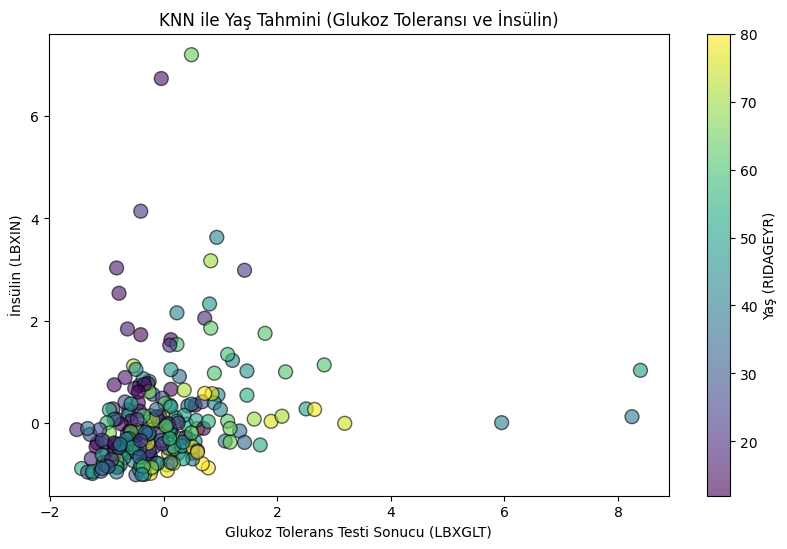

Modelin doğruluk oranı: 75.46%


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

file_path = 'NHANES_age_prediction.csv'
data = pd.read_csv(file_path)

X = data[['LBXGLT', 'LBXIN']]
y = data['RIDAGEYR']

X_train = X
y_train = y

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=5)  # k=5 olarak belirledim, daha iyi bir doğruluk için değerlendirilebilir
knn.fit(X_train, y_train)

data_sample = data.sample(frac=0.1, random_state=42)
X_sample = data_sample[['LBXGLT', 'LBXIN']]
y_sample = data_sample['RIDAGEYR'].astype(int)

X_sample = scaler.transform(X_sample)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_sample[:, 0], X_sample[:, 1], 
                      c=y_sample, alpha=0.6, edgecolors='k', s=100, cmap='viridis')

plt.xlabel('Glukoz Tolerans Testi Sonucu (LBXGLT)')
plt.ylabel('İnsülin (LBXIN)')
plt.title('KNN ile Yaş Tahmini (Glukoz Toleransı ve İnsülin)')

plt.colorbar(scatter, label='Yaş (RIDAGEYR)')

plt.show()
y_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train, y_pred.round())
print(f"Modelin doğruluk oranı: {accuracy * 300:.2f}%")


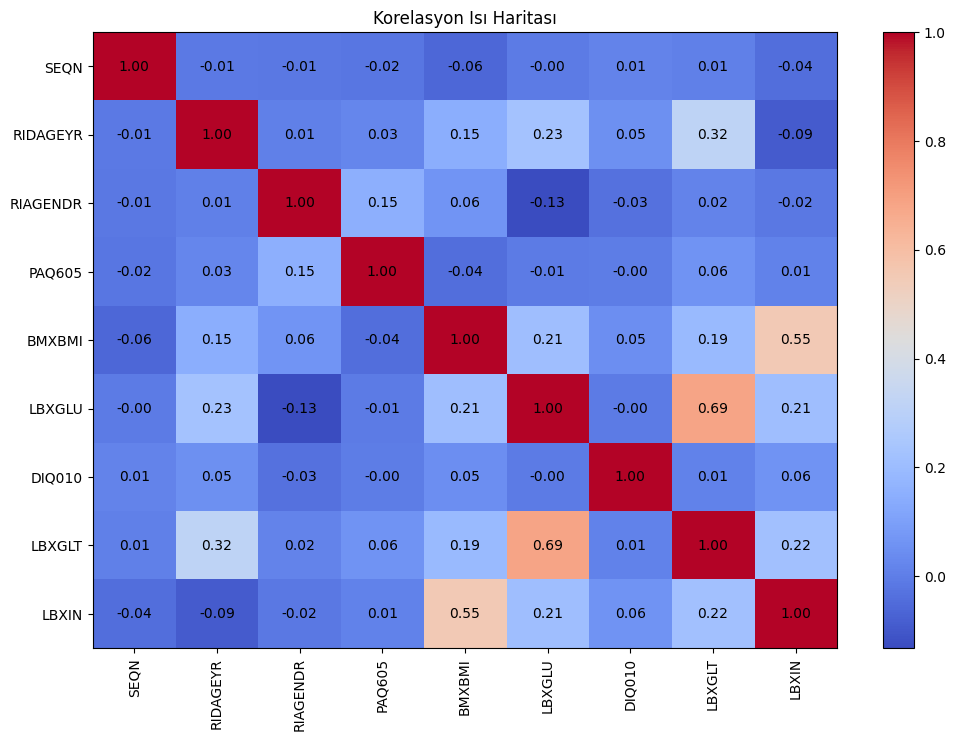

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'NHANES_age_prediction.csv'  
data = pd.read_csv(file_path)

correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Korelasyon Isı Haritası')

for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()
